In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings; warnings.simplefilter('ignore')
# %config InlineBackend.figure_format = 'svg' 
sns.set()

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

stud_math = pd.read_csv('stud_math.xls')

## Предоброботка

In [162]:
binary = {0: 'no', 1: 'yes'}

def outliers(data):
    '''Функция квартилей, IQR и границы выбросов'''
    median = data.median()
    perc25 = data.quantile(0.25)
    perc75 = data.quantile(0.75)
    IQR = perc75 - perc25
    print('25-й перцентиль: {},'.format(perc25),
          '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


def nominal_col(data):
    '''Принимает качественный признак и выводит
    количество уникальных'''
    print(data.value_counts(dropna=False))


def ordered_col(data, bins=10):
    '''Принимает количественный признак и выводит
    гистограмму, пропущенные значения и статистики'''
    data.hist(bins=bins)
    display(data.describe())
    print('Пропущенных значений: ', data.isnull().sum())


def fillna_moda(data):
    '''Замена пропусков на моду'''
    data.value_counts().index[0]
    data.fillna(data.value_counts().index[0], inplace=True)
    print(data.value_counts(dropna=False))


def fillna_random(data, n, m):
    '''Замена пропусков случайными числами от n до m'''
    return data.apply(lambda x: np.random.randint(n, m) if pd.isnull(x) else x)


def fillna_yes_no(data):
    '''Замена 0 на no и 1 на yes'''
    return data.apply(lambda x: 'yes' if x == 1 else 'no' if x == 0 else x)


def get_boxplot(column):
    '''Boxplot распределение score от значения переменной'''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    '''Проверка разницы распределении оценок по номинативным признакам,
     с помощью теста Стьюдента'''
    values = stud_math[column].unique()
    combinations_all = list(combinations(values, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math[column] == comb[0], 'score'],
                     stud_math.loc[stud_math[column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Обзор данных

In [163]:
stud_math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Переименуем колонки. Сделаем их в нижнем регистре.

In [164]:
stud_math.columns = stud_math.columns.str.lower()

In [165]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

У нас 395 строк и 30 колонок. Целевая переменная: score. Количественные переменные: age, absences, score. Остальные категориальные.

In [166]:
stud_math.isnull().sum() 

school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                45
medu                    3
fedu                   24
mjob                   19
fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Только 3 колонки без пропусков.

### Рассмотрим все колонки по отдельности

#### school               

In [167]:
nominal_col(stud_math.school)

GP    349
MS     46
Name: school, dtype: int64


Учащихся GP намного больше. Пропусков нет

#### sex                  

In [168]:
nominal_col(stud_math.sex)

F    208
M    187
Name: sex, dtype: int64


По половому признаку примерно одинаково.

#### age 

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Пропущенных значений:  0
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


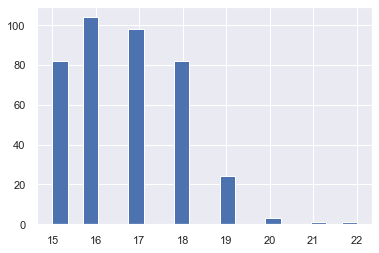

In [169]:
ordered_col(stud_math.age, 20)
outliers(stud_math.age)

Преобладают учащиеся в возрасте от 16 до 18 лет. Молодые люди в возрасте 22 года находятся за границей выбросов. Но это не выбросы, мы рассматриваем датасет учащихся в возрасте от 15 до 22 лет. Оставляем все значения

#### address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [170]:
nominal_col(stud_math.address)

U      295
R       83
NaN     17
Name: address, dtype: int64


В основном дети живут в городе. Так как мода ярко выраженна, заменим пустые значения на моду.

In [171]:
fillna_moda(stud_math.address)

U    312
R     83
Name: address, dtype: int64


#### famsize - размер семьи ('LE3' <= 3, 'GT3' > 3).

In [172]:
nominal_col(stud_math.famsize)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64


Семей с размером от 4 человек больше в 2.5 раза, поэтому пустые значения заменяем на моду.

In [173]:
fillna_moda(stud_math.famsize)

GT3    288
LE3    107
Name: famsize, dtype: int64


#### pstatus - статус совместного жилья родителей

In [174]:
nominal_col(stud_math.pstatus)

T      314
NaN     45
A       36
Name: pstatus, dtype: int64


'T' - живут вместе 'A' - раздельно. Обычно родители живут вместе. Есть пустые значения. Если семья состоит из 4 человек, то большая вероятность, что родители живут вместе. 

In [175]:
stud_math.loc[((stud_math['pstatus'].isnull()) & (stud_math['famsize'] == 'GT3')), 'pstatus'] = 'T'
nominal_col(stud_math.pstatus)

T      346
A       36
NaN     13
Name: pstatus, dtype: int64


Остальные пустые удалим

In [176]:
stud_math.drop(stud_math[stud_math.pstatus.isna()].index, inplace=True)
nominal_col(stud_math.pstatus)

T    346
A     36
Name: pstatus, dtype: int64


#### medu - образование матери

In [177]:
nominal_col(stud_math.medu)

4.0    131
2.0     99
3.0     89
1.0     57
0.0      3
NaN      3
Name: medu, dtype: int64


0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее. Заменим пропуски на моду.


In [178]:
fillna_moda(stud_math.medu)

4.0    134
2.0     99
3.0     89
1.0     57
0.0      3
Name: medu, dtype: int64


#### fedu - образование отца

In [179]:
nominal_col(stud_math.fedu)

2.0     104
3.0      91
4.0      85
1.0      75
NaN      24
0.0       2
40.0      1
Name: fedu, dtype: int64


Значение 40 - ошибка, скорее всего это 4. 

In [180]:
stud_math.loc[stud_math.fedu == 40, 'fedu'] = 4
nominal_col(stud_math.fedu)

2.0    104
3.0     91
4.0     86
1.0     75
NaN     24
0.0      2
Name: fedu, dtype: int64


0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее. Пропусков дастаточно много, заменю случайным значением 1 - 4. Вероятность значения равного 0 крайне мала, поэтому не включаем его. 

In [181]:
np.random.seed(0)
stud_math.fedu = fillna_random(stud_math.fedu, 1, 5)

#### mjob - работа матери

In [182]:
nominal_col(stud_math.mjob)

other       130
services     93
at_home      57
teacher      54
health       32
NaN          16
Name: mjob, dtype: int64


Пустые значения заменяем на моду.

In [183]:
fillna_moda(stud_math.mjob)

other       146
services     93
at_home      57
teacher      54
health       32
Name: mjob, dtype: int64


'teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое

#### fjob - работа отца

In [184]:
nominal_col(stud_math.fjob)

other       185
services    101
NaN          36
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64


'teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое

Пропусков 36. Слишком много для удаления (почти 10% от всех данных). Заменяем модой.

In [185]:
fillna_moda(stud_math.fjob)

other       221
services    101
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64


#### reason - причина выбора школы

In [186]:
nominal_col(stud_math.reason)

course        136
home           99
reputation     97
other          33
NaN            17
Name: reason, dtype: int64


'home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое

Большенство семей при выборе школы в первую очередь смотрели на образовательную программу. Пропуски заменяем модой.

In [187]:
fillna_moda(stud_math.reason)

course        153
home           99
reputation     97
other          33
Name: reason, dtype: int64


#### guardian - опекун

In [188]:
nominal_col(stud_math.guardian)

mother    240
father     84
NaN        31
other      27
Name: guardian, dtype: int64


'mother' - мать, 'father' - отец, 'other' - другое

Мода ярко выражена. Большая вероятность того, что большая часть пропусков совпадет с модой.

In [189]:
fillna_moda(stud_math.guardian)

mother    271
father     84
other      27
Name: guardian, dtype: int64


#### traveltime -  время в пути до школы

In [190]:
nominal_col(stud_math.traveltime)

1.0    236
2.0     92
NaN     27
3.0     21
4.0      6
Name: traveltime, dtype: int64


1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.

Обычно школу выбирают рядом с домом. Пустые заменим на случайные от 1-2.

In [191]:
np.random.seed(1)
stud_math.traveltime = fillna_random(stud_math.traveltime, 1, 3)

In [192]:
nominal_col(stud_math.traveltime)

1.0    250
2.0    105
3.0     21
4.0      6
Name: traveltime, dtype: int64


#### studytime - время на учёбу помимо школы в неделю

In [193]:
nominal_col(stud_math.studytime)

2.0    186
1.0    100
3.0     64
4.0     26
NaN      6
Name: studytime, dtype: int64


1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов

Пустые значения заменим случайными.

In [194]:
np.random.seed(2)
stud_math.studytime = fillna_random(stud_math.studytime, 1, 5)

In [195]:
nominal_col(stud_math.studytime)

2.0    187
1.0    102
3.0     65
4.0     28
Name: studytime, dtype: int64


#### failures - количество внеучебных неудач

In [196]:
nominal_col(stud_math.failures)

0.0    282
1.0     49
NaN     21
2.0     16
3.0     14
Name: failures, dtype: int64


n, если 1<=n<=3, иначе 0

Значительно больше детей не сталкивается с неудачами. Заменяем модой. 

In [197]:
fillna_moda(stud_math.failures)

0.0    303
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64


#### schoolsup - дополнительная образовательная поддержка

In [198]:
nominal_col(stud_math.schoolsup)

no     323
yes     50
NaN      9
Name: schoolsup, dtype: int64


Мода ярко выражена.

In [199]:
fillna_moda(stud_math.schoolsup)

no     332
yes     50
Name: schoolsup, dtype: int64


#### famsup — семейная образовательная поддержка 

In [200]:
nominal_col(stud_math.famsup)

yes    213
no     133
NaN     36
Name: famsup, dtype: int64


Заменим пропуски случайно

In [201]:
np.random.seed(3)
stud_math.famsup = fillna_random(stud_math.famsup, 0, 2)

In [202]:
stud_math.famsup = fillna_yes_no(stud_math.famsup)
nominal_col(stud_math.famsup)

yes    229
no     153
Name: famsup, dtype: int64


 #### paid — дополнительные платные занятия по математике

In [203]:
nominal_col(stud_math.paid)

no     194
yes    148
NaN     40
Name: paid, dtype: int64


Распределение примерно одинаковое. Случайно заполним пропуски

In [204]:
np.random.seed(4)
stud_math.paid = fillna_random(stud_math.paid, 0, 2)
stud_math.paid = fillna_yes_no(stud_math.paid)
nominal_col(stud_math.paid)

no     217
yes    165
Name: paid, dtype: int64


#### activities — дополнительные внеучебные занятия 

In [205]:
nominal_col(stud_math.activities)

yes    187
no     182
NaN     13
Name: activities, dtype: int64


Распределение примерно одинаковое. Случайно заполним пропуски

In [206]:
np.random.seed(5)
stud_math.activities = fillna_random(stud_math.activities, 0, 2)
stud_math.activities = fillna_yes_no(stud_math.activities)
nominal_col(stud_math.activities)

yes    193
no     189
Name: activities, dtype: int64


#### nursery — посещал детский сад

In [207]:
nominal_col(stud_math.nursery)

yes    289
no      77
NaN     16
Name: nursery, dtype: int64


Ощутимая разница, поэтому пропуски заменим модой.

In [208]:
fillna_moda(stud_math.nursery)

yes    305
no      77
Name: nursery, dtype: int64


#### studytime, granular

In [209]:
nominal_col(stud_math['studytime, granular'])

-6.0     186
-3.0     100
-9.0      64
-12.0     26
 NaN       6
Name: studytime, granular, dtype: int64


Похожая колонка studytime уже была. Этой колонки не должно быть в датасете, не понятно, что она показывает. Удалим ее.

In [210]:
stud_math.drop('studytime, granular', axis=1, inplace=True)

#### higher — хочет получить высшее образование

In [211]:
nominal_col(stud_math.higher)

yes    345
no      19
NaN     18
Name: higher, dtype: int64


Здесь очевидно, все хотят получить высшее образование. Пропуски заменяем модой.

In [212]:
fillna_moda(stud_math.higher)

yes    363
no      19
Name: higher, dtype: int64


#### internet — наличие интернета дома

In [213]:
nominal_col(stud_math.internet)

yes    295
no      54
NaN     33
Name: internet, dtype: int64


Почти у всех есть интернет дома. Пропуски заменяем модой.

In [214]:
fillna_moda(stud_math.internet)

yes    328
no      54
Name: internet, dtype: int64


#### romantic — в романтических отношениях

In [215]:
nominal_col(stud_math.romantic)

no     232
yes    121
NaN     29
Name: romantic, dtype: int64


Пропуски заменяем модой.

In [216]:
fillna_moda(stud_math.romantic)

no     261
yes    121
Name: romantic, dtype: int64


#### famrel — семейные отношения

In [217]:
nominal_col(stud_math.famrel)

 4.0    177
 5.0     94
 3.0     60
 NaN     27
 2.0     17
 1.0      6
-1.0      1
Name: famrel, dtype: int64


1 - очень плохо до 5 - очень хорошо. значение -1 скорее всего опечатка. Заменим на 1

In [218]:
stud_math.loc[stud_math.famrel == -1, 'famrel'] = 1
nominal_col(stud_math.famrel)

4.0    177
5.0     94
3.0     60
NaN     27
2.0     17
1.0      7
Name: famrel, dtype: int64


Пропуски удалим.

In [219]:
stud_math.drop(stud_math[stud_math.famrel.isnull() == True].index, inplace=True)
nominal_col(stud_math.famrel)

4.0    177
5.0     94
3.0     60
2.0     17
1.0      7
Name: famrel, dtype: int64


#### freetime — свободное время после школы

In [220]:
nominal_col(stud_math.freetime)

3.0    134
4.0    103
2.0     56
5.0     35
1.0     17
NaN     10
Name: freetime, dtype: int64


От 1 - очень мало до 5 - очень мого. Заполним пропуски случайно 3 или 4, т.к. чаще встречаются и примерно равны.

In [221]:
np.random.seed(6)
stud_math.freetime = fillna_random(stud_math.freetime, 3, 5)
nominal_col(stud_math.freetime)

3.0    140
4.0    107
2.0     56
5.0     35
1.0     17
Name: freetime, dtype: int64


#### goout — проведение времени с друзьями

In [222]:
nominal_col(stud_math.goout)

3.0    114
2.0     93
4.0     75
5.0     45
1.0     20
NaN      8
Name: goout, dtype: int64


От 1 - очень мало до 5 - очень мого. Заполним пропуски случайно 2 - 4. 

In [223]:
np.random.seed(6)
stud_math.goout = fillna_random(stud_math.goout, 2, 5)
nominal_col(stud_math.goout)

3.0    116
2.0     95
4.0     79
5.0     45
1.0     20
Name: goout, dtype: int64


#### health — текущее состояние здоровья

In [224]:
nominal_col(stud_math.health)

5.0    117
3.0     84
4.0     59
2.0     41
1.0     40
NaN     14
Name: health, dtype: int64


от 1 - очень мало до 5 - очень много. Заполним пропуски случайно.

In [225]:
np.random.seed(7)
stud_math.health = fillna_random(stud_math.health, 2, 5)
nominal_col(stud_math.health)

5.0    117
3.0     87
4.0     65
2.0     46
1.0     40
Name: health, dtype: int64


#### absences — количество пропущенных занятий

count    345.000000
mean       7.173913
std       24.228777
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Пропущенных значений:  10
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


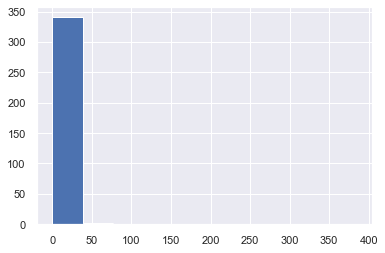

In [226]:
ordered_col(stud_math.absences)
outliers(stud_math.absences)

посмотрим на выбросы

In [227]:
stud_math[stud_math.absences > 20].absences.sort_values().unique()

array([ 21.,  22.,  23.,  24.,  25.,  26.,  28.,  30.,  38.,  40.,  54.,
       212., 385.])

Очень странные значения  385 и 212. Удалим их, сильно влияют на статистики. Заполним пропуски средним .

In [228]:
stud_math.drop(stud_math[stud_math.absences > 200].index, inplace=True)
stud_math.fillna(round(stud_math.absences.mean()), inplace=True)

#### score — баллы по госэкзамену по математике

count    353.000000
mean      51.487252
std       23.524298
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

Пропущенных значений:  0
25-й перцентиль: 40.0, 75-й перцентиль: 65.0, IQR: 25.0,  Границы выбросов: [2.5, 102.5].


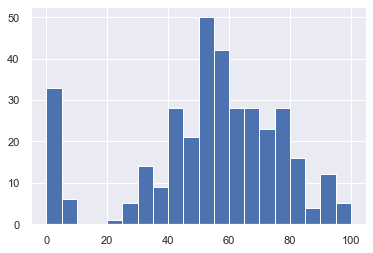

In [229]:
ordered_col(stud_math.score,20)
outliers(stud_math.score)

In [230]:
len(stud_math[stud_math.score == 0])

33

33 человека получили 0 балов. Получить 0 балов можно, если человек не пришел на экзамен, списывал и ему онулировали оценку. Будем считать, что эти люди не писали экзамен вообще и удалим их.

In [231]:
stud_math.drop(stud_math[stud_math.score == 0].index, inplace=True)

count    320.000000
mean      56.796875
std       17.553483
min        5.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Пропущенных значений:  0


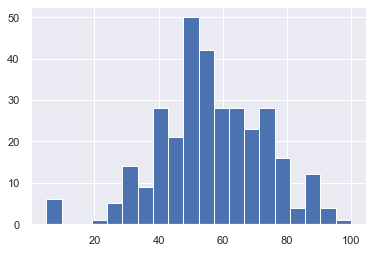

In [232]:
ordered_col(stud_math.score,20)

Теперь признак респределен примерно нормально.

In [233]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      320 non-null    object 
 1   sex         320 non-null    object 
 2   age         320 non-null    int64  
 3   address     320 non-null    object 
 4   famsize     320 non-null    object 
 5   pstatus     320 non-null    object 
 6   medu        320 non-null    float64
 7   fedu        320 non-null    float64
 8   mjob        320 non-null    object 
 9   fjob        320 non-null    object 
 10  reason      320 non-null    object 
 11  guardian    320 non-null    object 
 12  traveltime  320 non-null    float64
 13  studytime   320 non-null    float64
 14  failures    320 non-null    float64
 15  schoolsup   320 non-null    object 
 16  famsup      320 non-null    object 
 17  paid        320 non-null    object 
 18  activities  320 non-null    object 
 19  nursery     320 non-null    o

Все пропуски заполнены или удалены. Было 395 строк, осталось 320

### Корреляционный анализ

Рассмотрим корреляцию только для числовых столбцов.

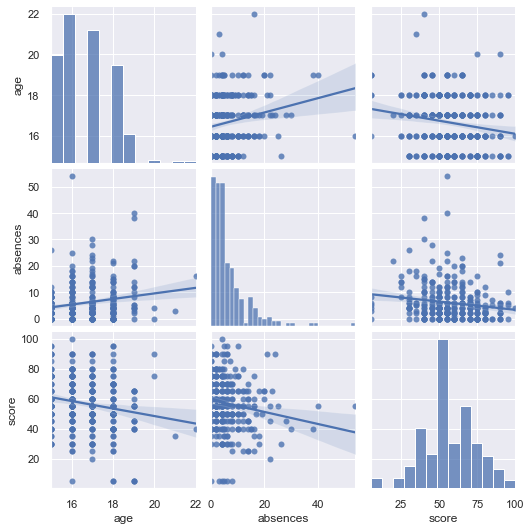

In [234]:
ordered_list = ['age', 'absences' , 'score'] # Количественные переменные
sns.pairplot(stud_math[ordered_list], kind = 'reg')

In [235]:
stud_math[ordered_list].corr()

,age,absences,score
age,1.000000,0.192808,-0.179763
absences,0.192808,1.000000,-0.158240
score,-0.179763,-0.158240,1.000000


Скоррелированных переменных нет. Оставляем все переменные. Обе числовые переменные отрицательно коррелируются с целевой переменной score. Чем больше балов набирает ученик, тем моложе он и меньше у него пропущенных занятий. 

### Анализ номинативных переменных

Для номинативных переменных посмотрим, различаются ли распределения score в зависимости от значения этих переменных. Для этого построем boxplot для каждой переменной.

In [236]:
nominal_list = ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                'health']  # Качественные переменные

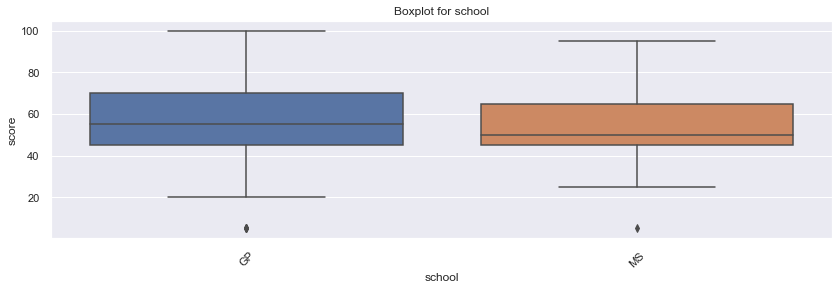

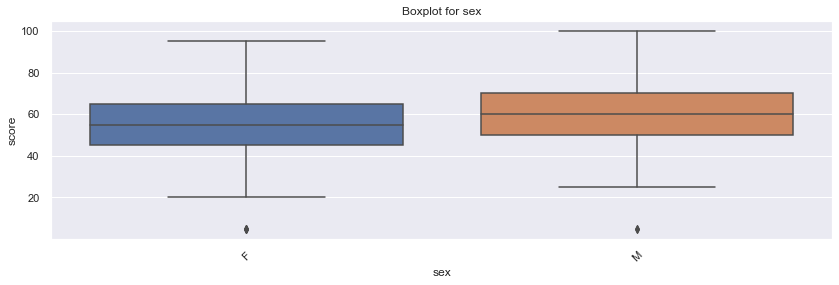

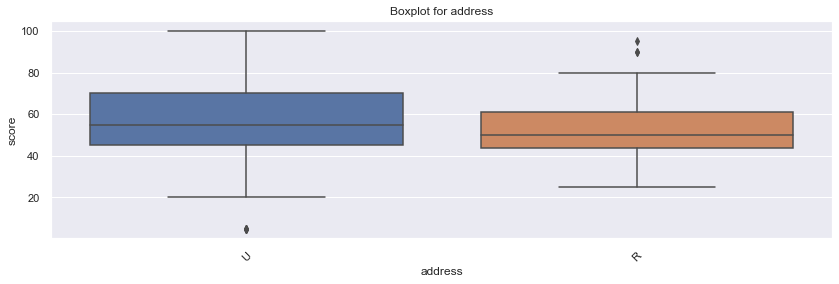

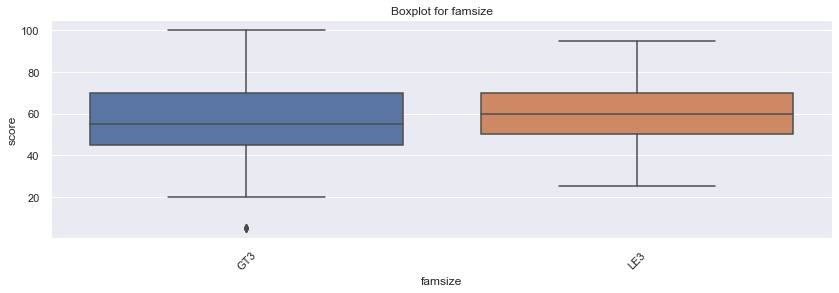

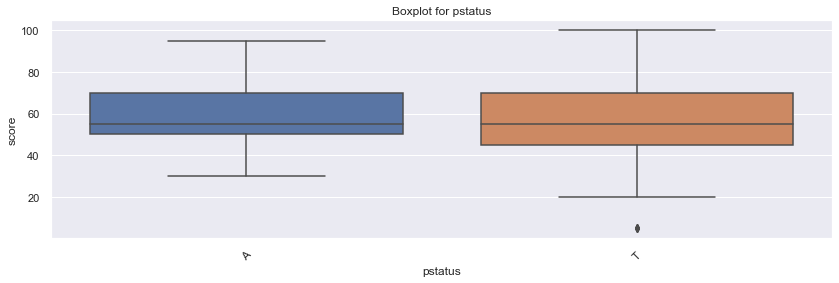

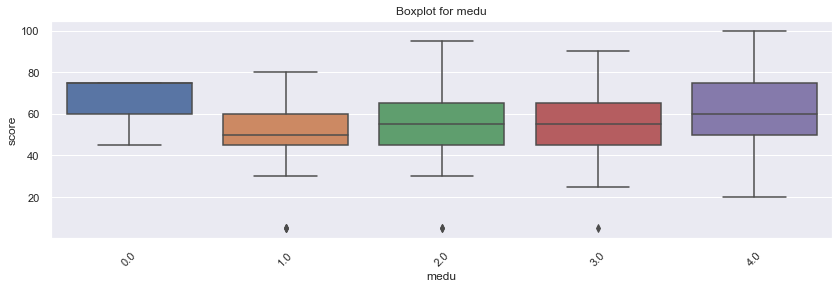

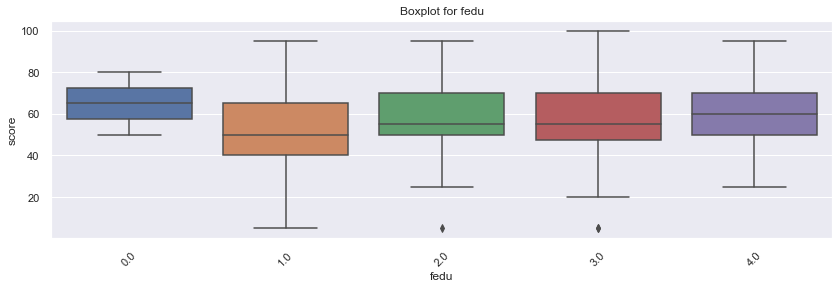

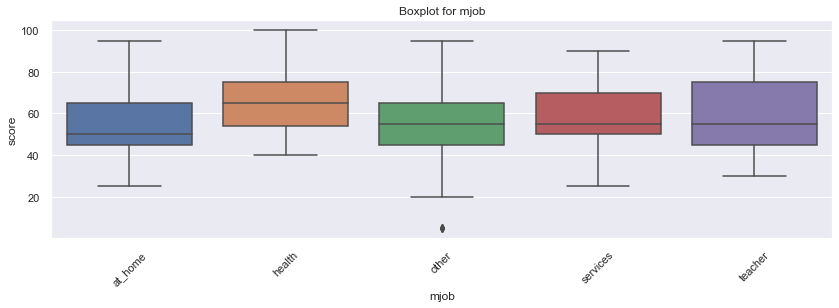

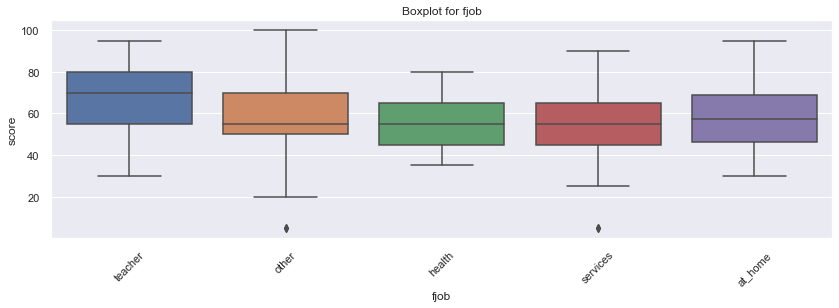

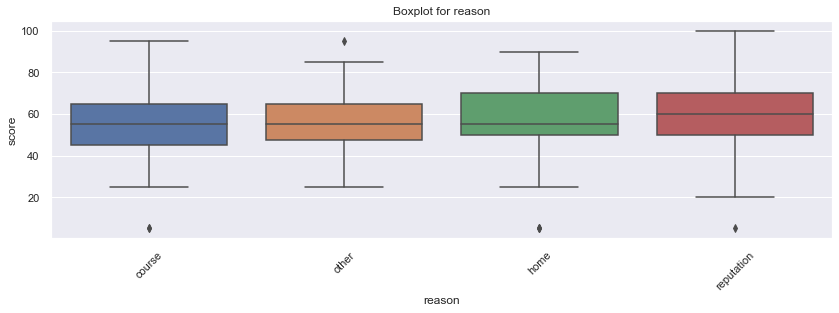

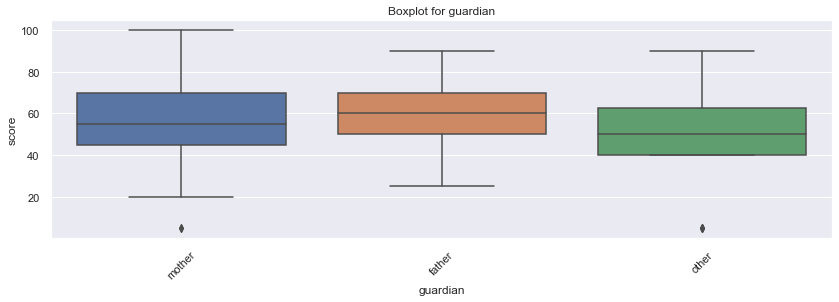

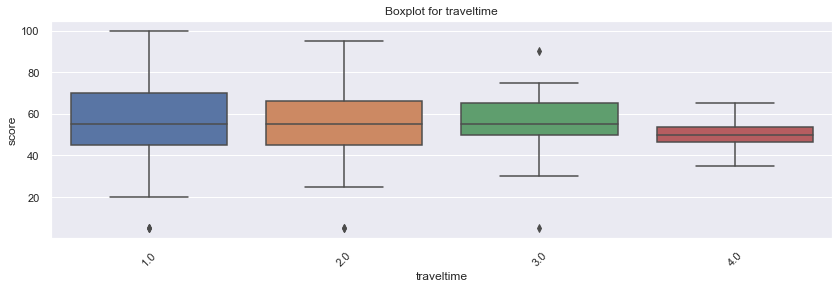

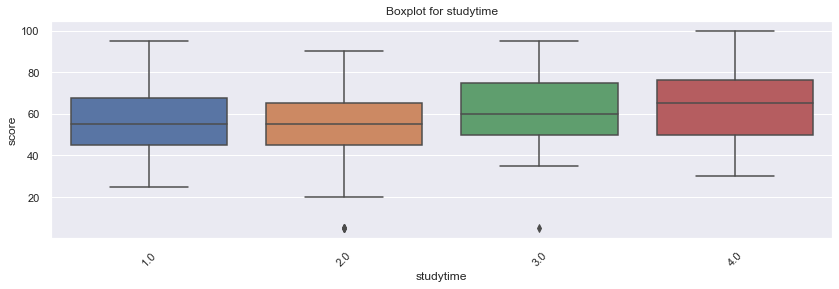

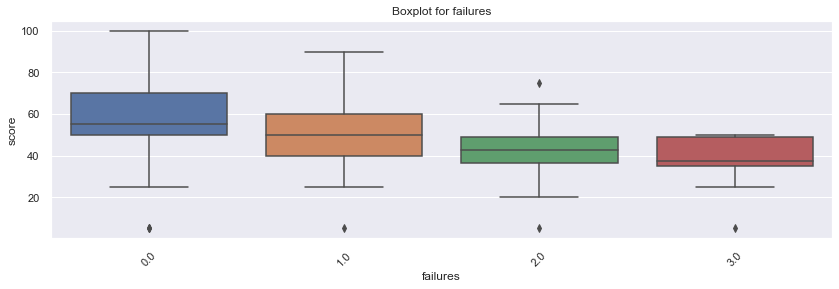

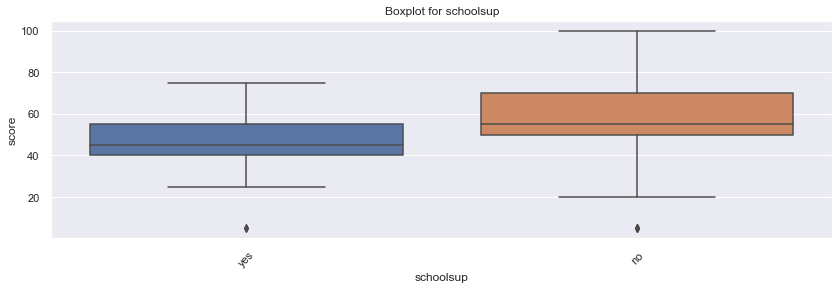

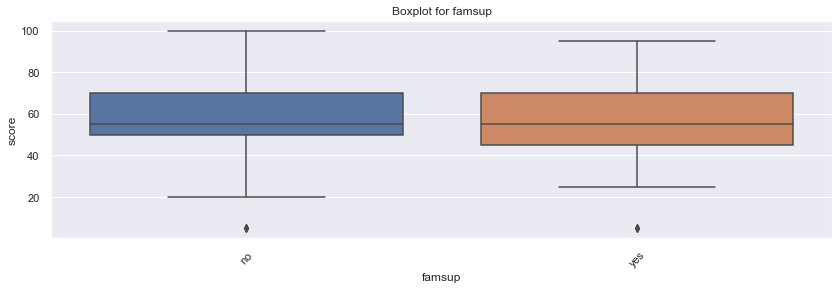

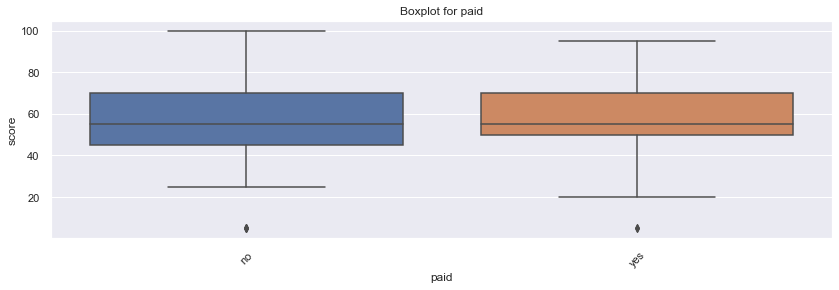

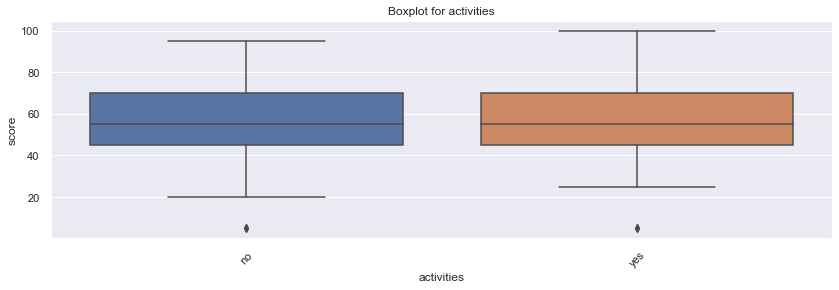

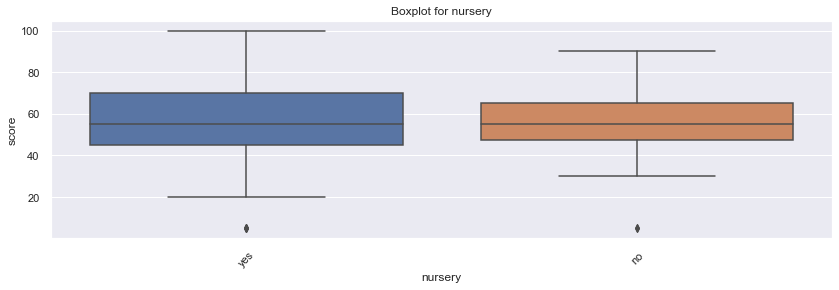

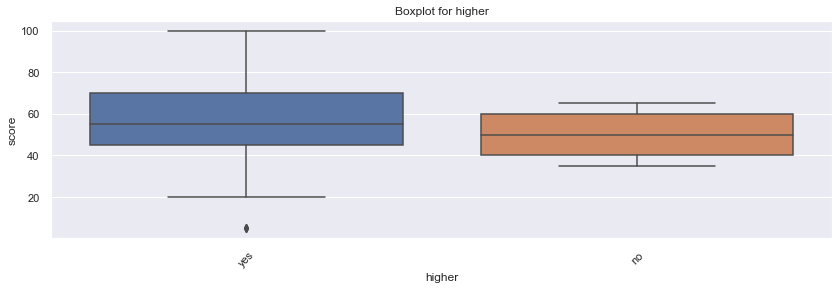

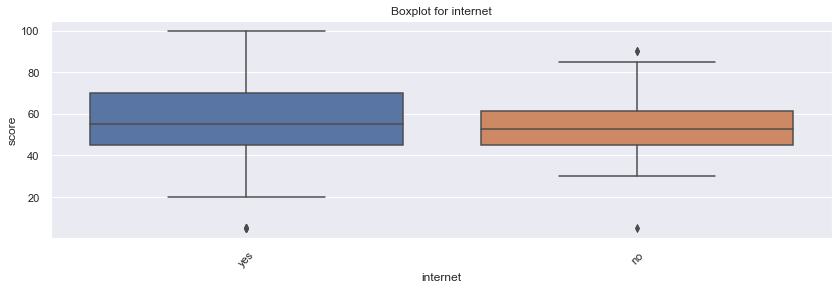

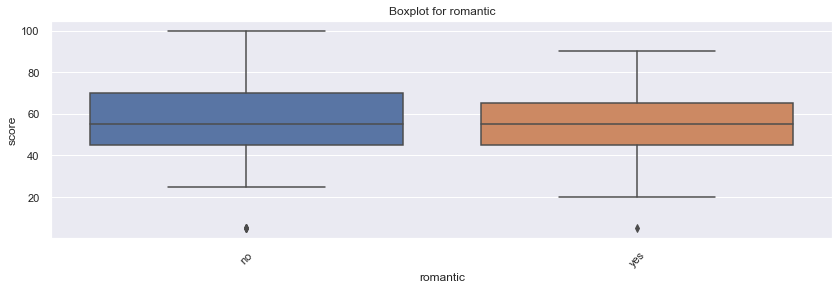

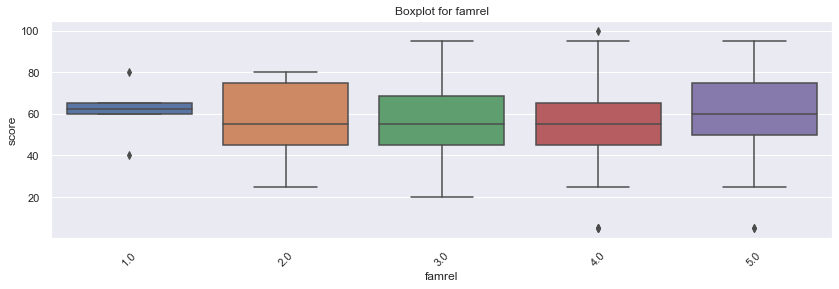

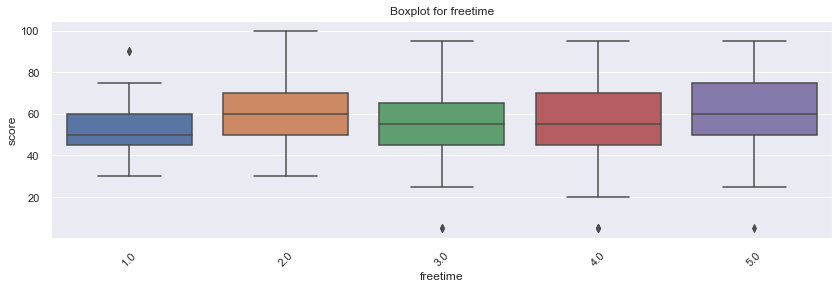

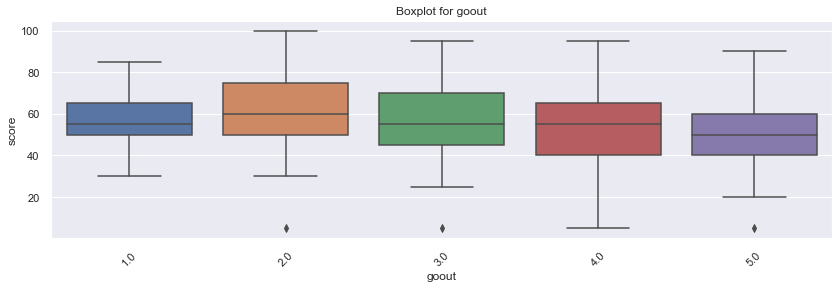

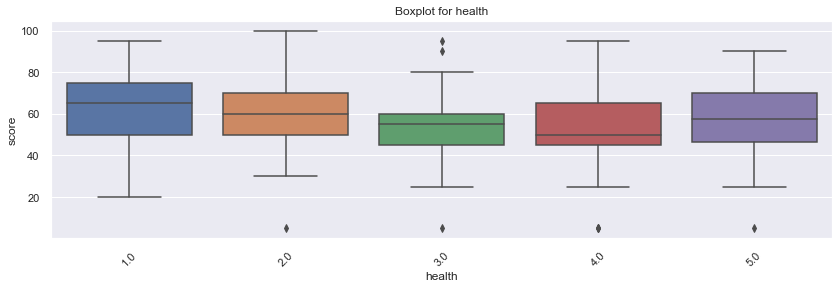

In [237]:
for col in nominal_list:
    get_boxplot(col)

Судя по графикам medu, failures, studytime и schoolsup влияют на score. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения балов на экзамене по различным параметрам неразличимы.

In [238]:
for col in nominal_list:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


Как мы видим, серьёзно отличаются параметры в переменных: medu,  fjob, guardian, studytime, failures, schoolsup, goout. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: medu,  fjob, guardian, studytime, failures, schoolsup, goout, age, absences.

In [239]:
stud_for_model = stud_math[['medu', 'fjob', 'guardian',
                            'studytime', 'failures', 'schoolsup',
                            'goout', 'age', 'absences']]

In [240]:
stud_for_model.head()

,medu,fjob,guardian,studytime,failures,schoolsup,goout,age,absences
0,4.0,teacher,mother,2.0,0.0,yes,4.0,18,6.0
1,1.0,other,father,2.0,0.0,no,3.0,17,4.0
2,1.0,other,mother,2.0,3.0,yes,2.0,15,10.0
3,4.0,other,mother,3.0,0.0,no,2.0,15,2.0
4,3.0,other,father,2.0,0.0,no,2.0,16,4.0


Мы заполнили все пропуски, оставили большую часть данных и отобрали значимые переменные для обучения модели. 